In [1]:
import time
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataset
iris = load_iris()

# convert dts and rename col
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.columns = [col.replace(' (cm)', '').replace(" ", "_") for col in df.columns]
df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [4]:
# add species label 2 dataset
df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# feature n target
X = df.drop('species', axis=1)
y = df['species']

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# init model
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# train model
clf.fit(X_train, y_train)

# predict
y_pred = clf.predict(X_test)

In [5]:
# measure training time
start = time.time()
clf.fit(X_train, y_train)
time_full = time.time() - start

# measure prediction time
pred_start = time.time()
y_pred = clf.predict(X_test)
time_pred = time.time() - pred_start

# accuracy
accuracy = accuracy_score(y_test, y_pred)

# result
print(f'Feature used in full model: {X.columns.tolist()}')
print(f'Train Time (Full Feature): {time_full:.4f} s')
print(f'Prediction Time (Full Feature): {time_pred:.4f} s')
print(f'Accuracy (Full Feature): {accuracy:.4f}\n')

Feature used in full model: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Train Time (Full Feature): 0.0905 s
Prediction Time (Full Feature): 0.0040 s
Accuracy (Full Feature): 1.0000



In [ ]:
# example
new_flower = np.array([[5.5, 3.0, 4.5, 1.3]])

# predict
new_pred = clf.predict(new_flower)
print(f'Predicted Species: {new_pred[0]}')

Predicted Species: versicolor


c:\Users\mook\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [12]:
# measure feature selection time
fs_start_time = time.time()
mi = mutual_info_classif(X_train, y_train)
fs_time = time.time() - fs_start_time

# store feature score
mi_df = pd.DataFrame({'Feature': X.columns, 'Score': mi}).sort_values(by='Score',ascending=False)

# select the top 2 most important features
selected_features = mi_df['Feature'].iloc[:2].tolist()
X_train_sel = X_train[selected_features]
X_test_sel = X_test[selected_features]

# measure training time
train_start = time.time()
clf.fit(X_train_sel, y_train)
train_sel = time.time() - train_start

# measure predict time
pred_start = time.time()
y_pred_sel = clf.predict(X_test_sel)
time_pred_sel = time.time() - pred_start

# accuracy
accuracy_sel = accuracy_score(y_test, y_pred_sel)

# result
print(f'Selected Features: {selected_features}')
print(f'Feature Selection Time: {fs_time:.4f} s')
print(f'Training Time (Selected Feature): {train_sel:.4f} s')
print(f'Prediction Time (Selected Feature): {time_pred_sel:.4f} s')
print(f'Feature Selection Accuracy: {accuracy_sel:.4f}\n')

Selected Features: ['petal_length', 'petal_width']
Feature Selection Time: 0.1305 s
Training Time (Selected Feature): 0.1126 s
Prediction Time (Selected Feature): 0.0040 s
Feature Selection Accuracy: 1.0000



In [13]:
# result
print(f'\n--Model Performance Comparison--\n')

print(f'Feature used in full model: {X.columns.tolist()}')
print(f'Train Time (Full Feature): {time_full:.4f} s')
print(f'Prediction Time (Full Feature): {time_pred:.4f} s')
print(f'Accuracy (Full Feature): {accuracy:.4f}\n')

print(f'Selected Features: {selected_features}')
print(f'Feature Selection Time: {fs_time:.4f} s')
print(f'Training Time (Selected Feature): {train_sel:.4f} s')
print(f'Prediction Time (Selected Feature): {time_pred_sel:.4f} s')
print(f'Feature Selection Accuracy: {accuracy_sel:.4f}\n')


--Model Performance Comparison--

Feature used in full model: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Train Time (Full Feature): 0.0905 s
Prediction Time (Full Feature): 0.0040 s
Accuracy (Full Feature): 1.0000

Selected Features: ['petal_length', 'petal_width']
Feature Selection Time: 0.1305 s
Training Time (Selected Feature): 0.1126 s
Prediction Time (Selected Feature): 0.0040 s
Feature Selection Accuracy: 1.0000



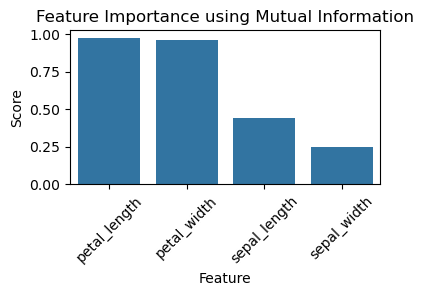

In [14]:
# display feature score
plt.figure(figsize=(4, 2))
sns.barplot(x=mi_df['Feature'], y=mi_df['Score'])
plt.title('Feature Importance using Mutual Information')
plt.xticks(rotation=45)
plt.show()

In [15]:
explanation = """
The reason why the selected model (using only ['petal_length', 'petal_width']) 
has the same accuracy as the full model (using all four features) but a slightly longer computational time 
is due to the following factors:

1. Feature Importance in the Iris Dataset
    - The Iris dataset is well-structured, and petal_length and petal_width are the most important features for classification.
    - Setosa species is already well-separated from the other two using these two features.
    - Versicolor vs. Virginica can also be mostly distinguished by these features, meaning that sepal_length and sepal_width do not add much new information.

2. Why is the Time for Selected Features Slightly Higher?
    - Expectation: The selected feature model should run faster due to fewer features.
    - Reality: The time difference (~0.01 sec) is due to random fluctuations in execution time, such as:
        - Memory allocation variations.
        - CPU scheduling differences.
        - The dataset being very small (150 samples), so reducing features does not significantly improve speed.

3. Mutual Information & Feature Selection Justification
    - Mutual Information correctly identified the two best features.
    - The fact that accuracy remains the same confirms that removing sepal_length and sepal_width did not harm classification.

4. Should You Always Use Feature Selection?
    - For small datasets like Iris: It doesn’t significantly affect performance.
    - For larger datasets: Reducing unnecessary features will speed up training, reduce overfitting, and improve interpretability.
"""

print(explanation)


The reason why the selected model (using only ['petal_length', 'petal_width']) 
has the same accuracy as the full model (using all four features) but a slightly longer computational time 
is due to the following factors:

1. Feature Importance in the Iris Dataset
    - The Iris dataset is well-structured, and petal_length and petal_width are the most important features for classification.
    - Setosa species is already well-separated from the other two using these two features.
    - Versicolor vs. Virginica can also be mostly distinguished by these features, meaning that sepal_length and sepal_width do not add much new information.

2. Why is the Time for Selected Features Slightly Higher?
    - Expectation: The selected feature model should run faster due to fewer features.
    - Reality: The time difference (~0.01 sec) is due to random fluctuations in execution time, such as:
        - Memory allocation variations.
        - CPU scheduling differences.
        - The dataset being 